# Importing Necessary Libraries

##By : Divya Ray

The name Titanic derives from the Titans of Greek mythology. Built in Belfast, Ireland, in the United Kingdom of Great Britain and Ireland, the RMS Titanic was the second of the three Olympic-class ocean liners—the first was the RMS Olympic and the third was the HMHS Britannic. Britannic was originally to be called Gigantic and was to be over 1,000 feet (300 m) long. They were by far the largest vessels of the British shipping company White Star Line's fleet, which comprised 29 steamers and tenders in 1912. The three ships had their genesis in a discussion in mid-1907 between the White Star Line's chairman, J. Bruce Ismay, and the American financier J. P. Morgan, who controlled the White Star Line's parent corporation, the International Mercantile Marine Co.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("rainbow")
%matplotlib inline

# Importing Dataset

In [2]:
train_df = pd.read_csv(r"../input/titanic/train.csv")

train = train_df.copy()

train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S


In [3]:
def RowCol(data):
    print(f"Total Row is {data.shape[0]} and total Column is {data.shape[1]}")     

In [4]:
RowCol(train)

Total Row is 891 and total Column is 12


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

### **1.1 Overview**
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

## Univariate Analysis
First, we will only analyze the independent features. We will try to plot the categorical and the numerical distributions and will try to learn something from them. Once we are done with this, bivariate and multivariate will be easier as we will have more intuition of the data.

In [6]:
countfeature = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
countlist = list(enumerate(countfeature))

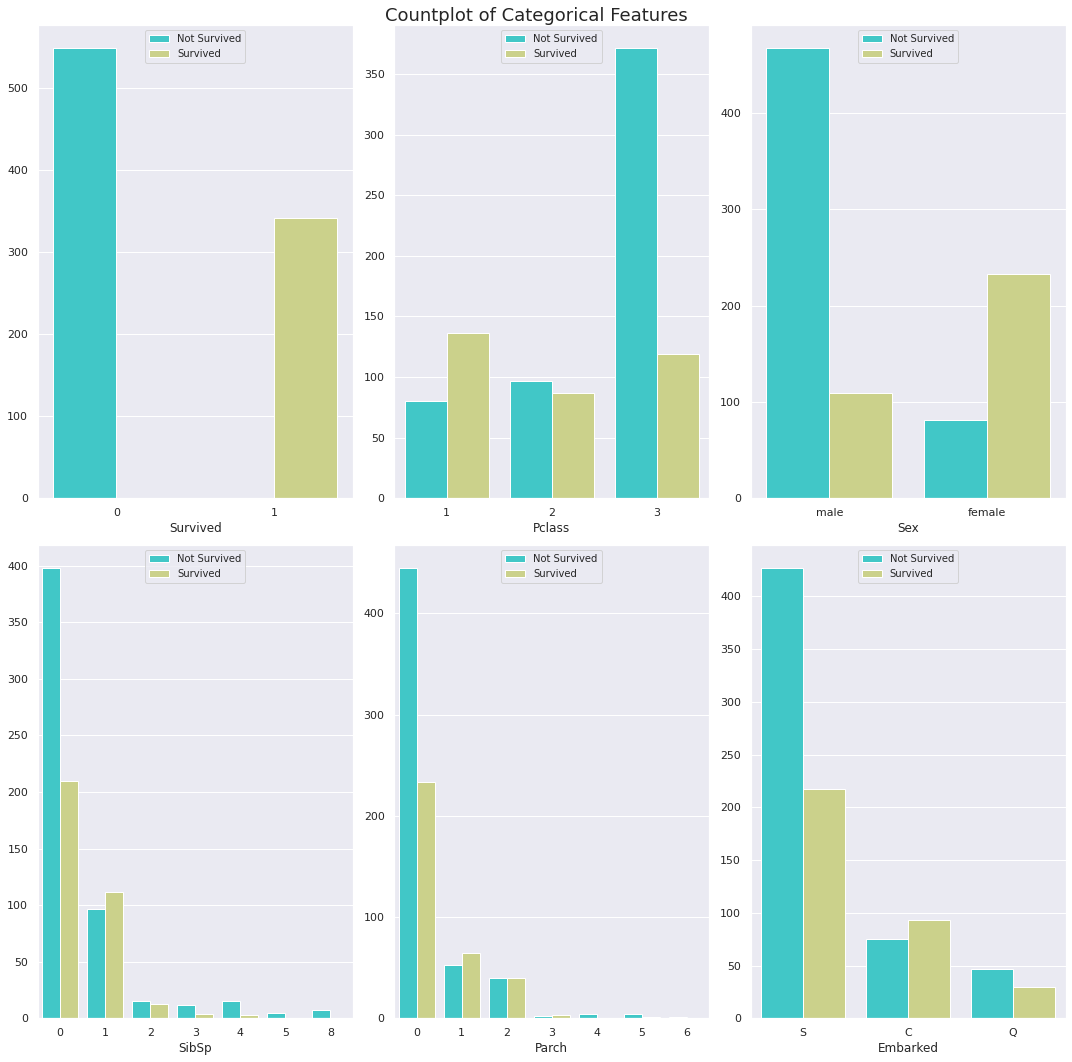

In [7]:
plt.figure(figsize = (15,15))
plt.suptitle("Countplot of Categorical Features", fontsize=18)
for i in countlist: 
    plt.subplot(2,3,i[0]+1)
    sns.countplot(data = train, x = i[1], hue = "Survived", palette="rainbow")
    plt.ylabel("")
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.tight_layout()
plt.show()

In [8]:
numfeature = ["Age", "Fare"]
enumfeat = list(enumerate(numfeature))

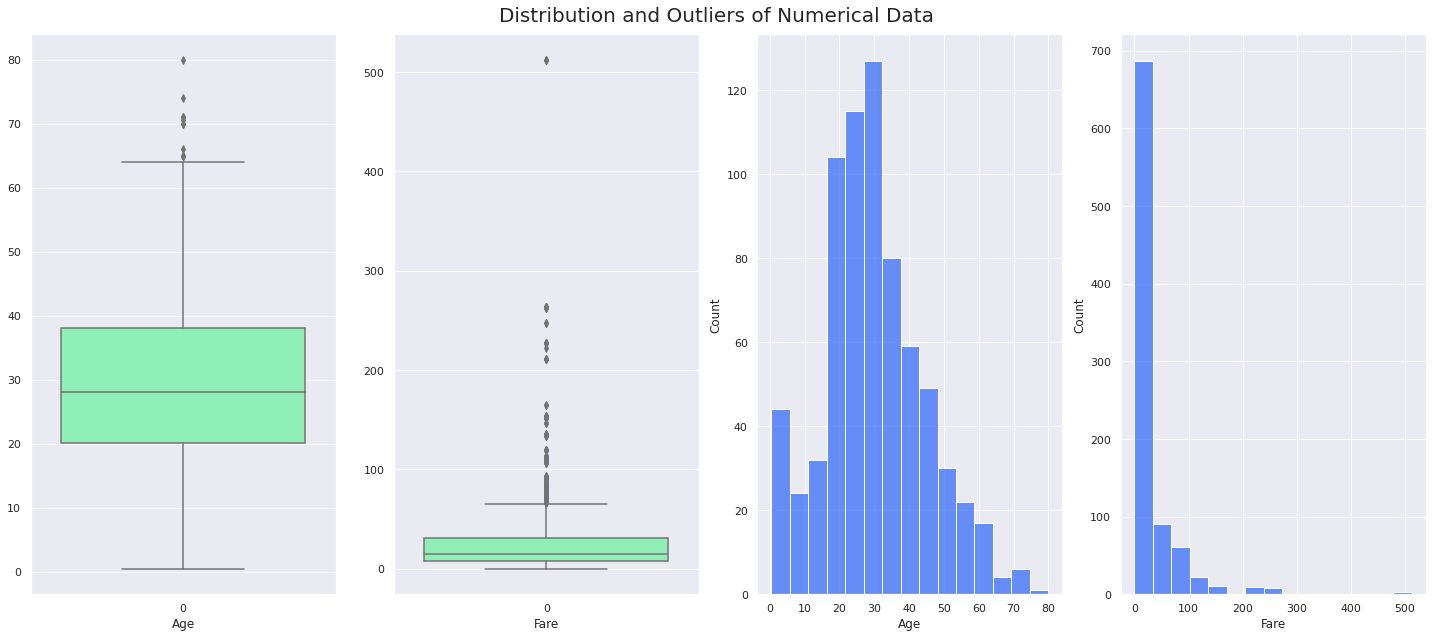

In [9]:
plt.figure(figsize=(20,9))
plt.suptitle("Distribution and Outliers of Numerical Data", fontsize=20)
for i in enumfeat:
    plt.subplot(1,4,i[0]+1)
    sns.boxplot(data = train[i[1]], palette="rainbow")
    plt.xlabel(str(i[1]))
for i in enumfeat:
    plt.subplot(1,4,i[0]+3)
    sns.histplot(data = train[i[1]], palette="rainbow", bins=15)
    plt.xlabel(str(i[1]))
plt.tight_layout()
plt.show()

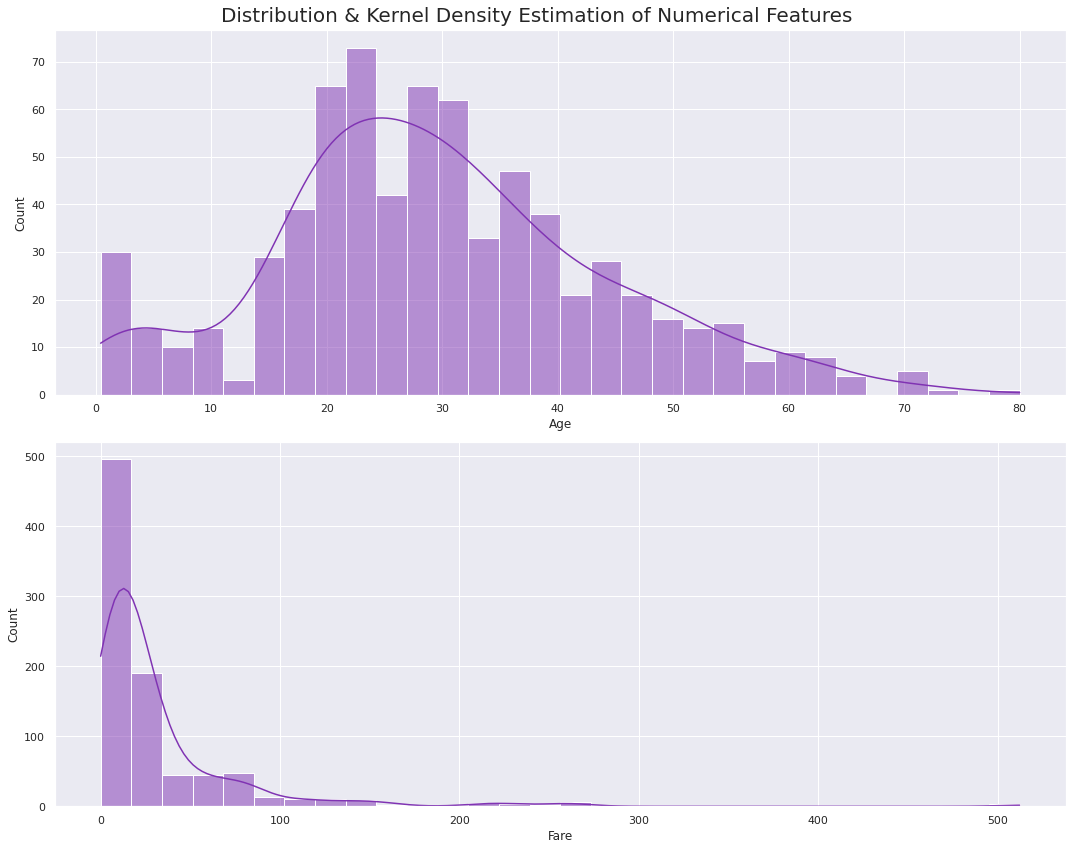

In [10]:
plt.figure(figsize=(15,12))
plt.suptitle("Distribution & Kernel Density Estimation of Numerical Features", fontsize=20)
for i in enumfeat:
    plt.subplot(2,1,i[0]+1)
    sns.histplot(x = train[i[1]], kde=True, bins=30, color=(0.50,0.20,0.70))
plt.tight_layout()
plt.show()

## Bivariate and Multivariate Analysis
Now, as we have a intuition of the independent variable, we will try to learn something new from analysing the relationship between these individual variables and how they are correlated. This will help us in feature engineering and further in selecting an appropriate model for the inference of test data.

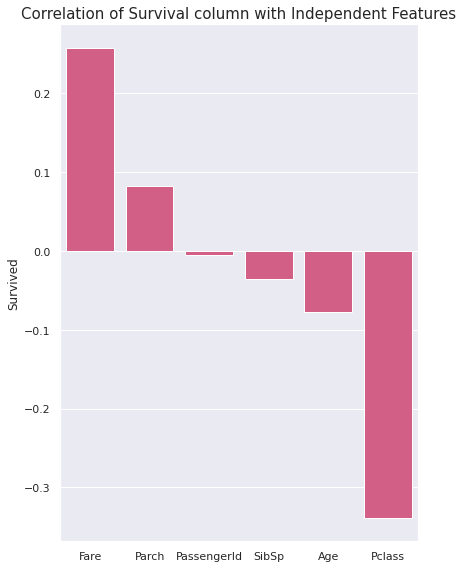

In [11]:
plt.figure(figsize=(6,8))
plt.title("Correlation of Survival column with Independent Features", fontsize=15)
corr = train.corr()["Survived"].sort_values(ascending=False)[1:]
sns.barplot(x=corr.index, y=corr, color=(0.90,0.30,0.50))
plt.tight_layout()
plt.show()

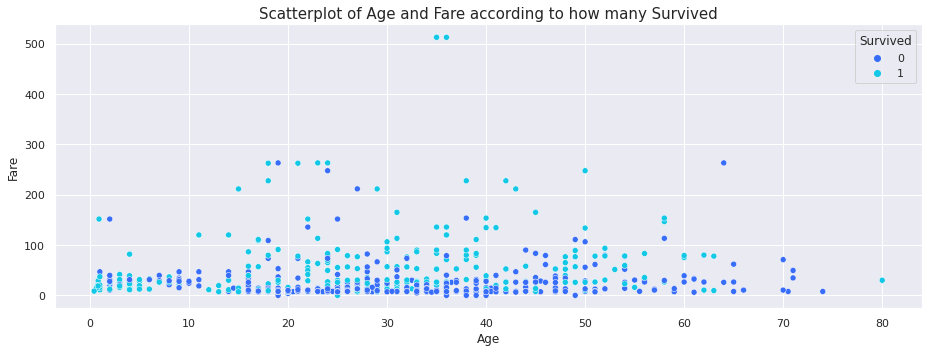

In [12]:
plt.figure(figsize=(13,5))
plt.title("Scatterplot of Age and Fare according to how many Survived", fontsize=15)
sns.scatterplot(data = train, x = "Age", y="Fare", hue='Survived')
plt.tight_layout()
plt.show()

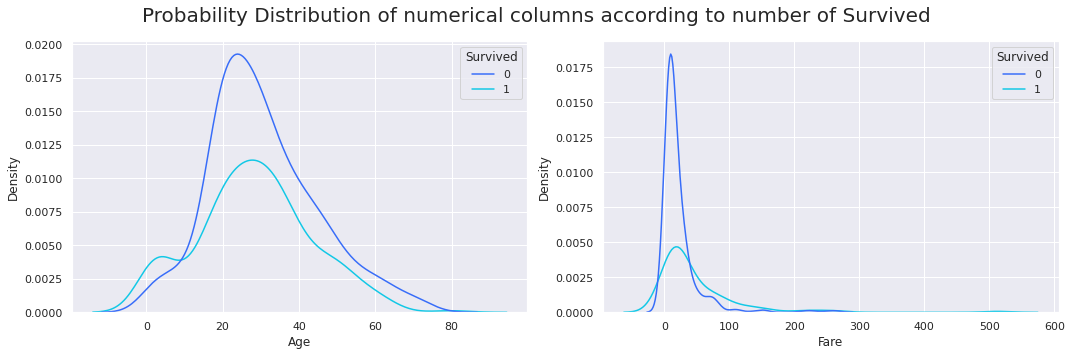

In [13]:
plt.figure(figsize=(15,5))
plt.suptitle("Probability Distribution of numerical columns according to number of Survived", fontsize = 20)
for i in enumfeat:
    plt.subplot(1,2,i[0]+1)
    sns.kdeplot(data=train, x=i[1], hue="Survived")
plt.tight_layout()
plt.show()

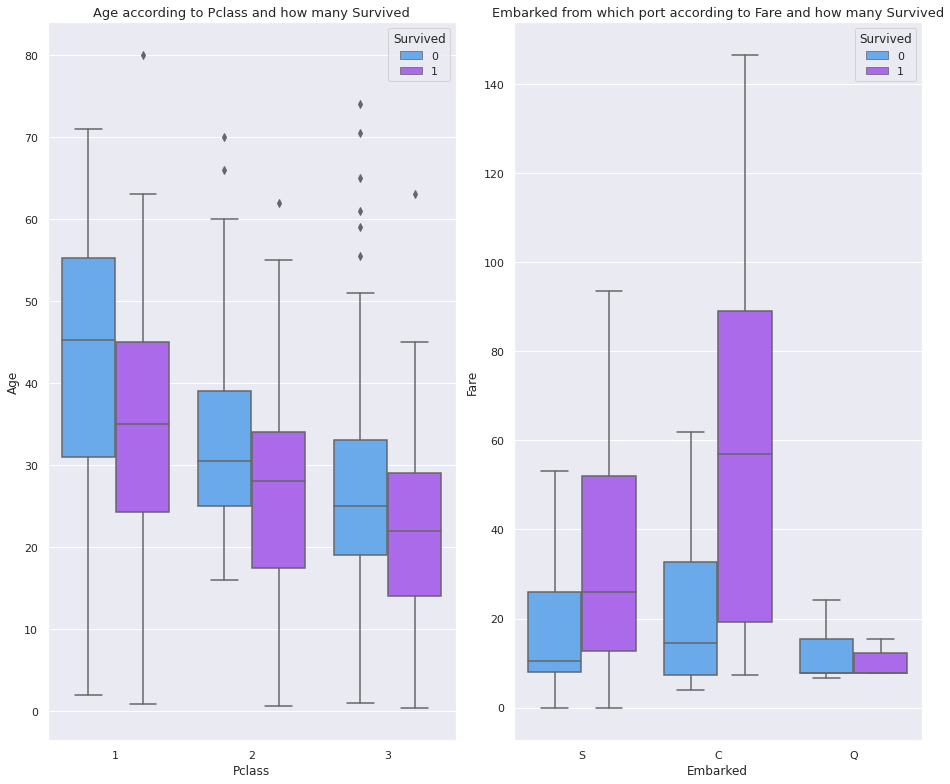

In [14]:
plt.figure(figsize=(13,11))

plt.subplot(1,2,1)
plt.title("Age according to Pclass and how many Survived", fontsize=13)
sns.boxplot(data = train, y ="Age", x ="Pclass", hue="Survived", palette="cool")

#Two extreme outliers were ruining the boxplot on the right. Showfliers parameter has been used to remove the outliers of Fare. 
plt.subplot(1,2,2)
plt.title("Embarked from which port according to Fare and how many Survived", fontsize=13)
sns.boxplot(data = train, y ="Fare", x ="Embarked", hue="Survived", palette="cool", showfliers=False)

plt.tight_layout()
plt.show()

# Train test split

In [15]:
def dropcol(data):
    data.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)
dropcol(data=train)

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=["Survived"]), train["Survived"], 
                                                    test_size=0.2, random_state=42)

# Feature Engineering and Model Building using Pipeline

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2

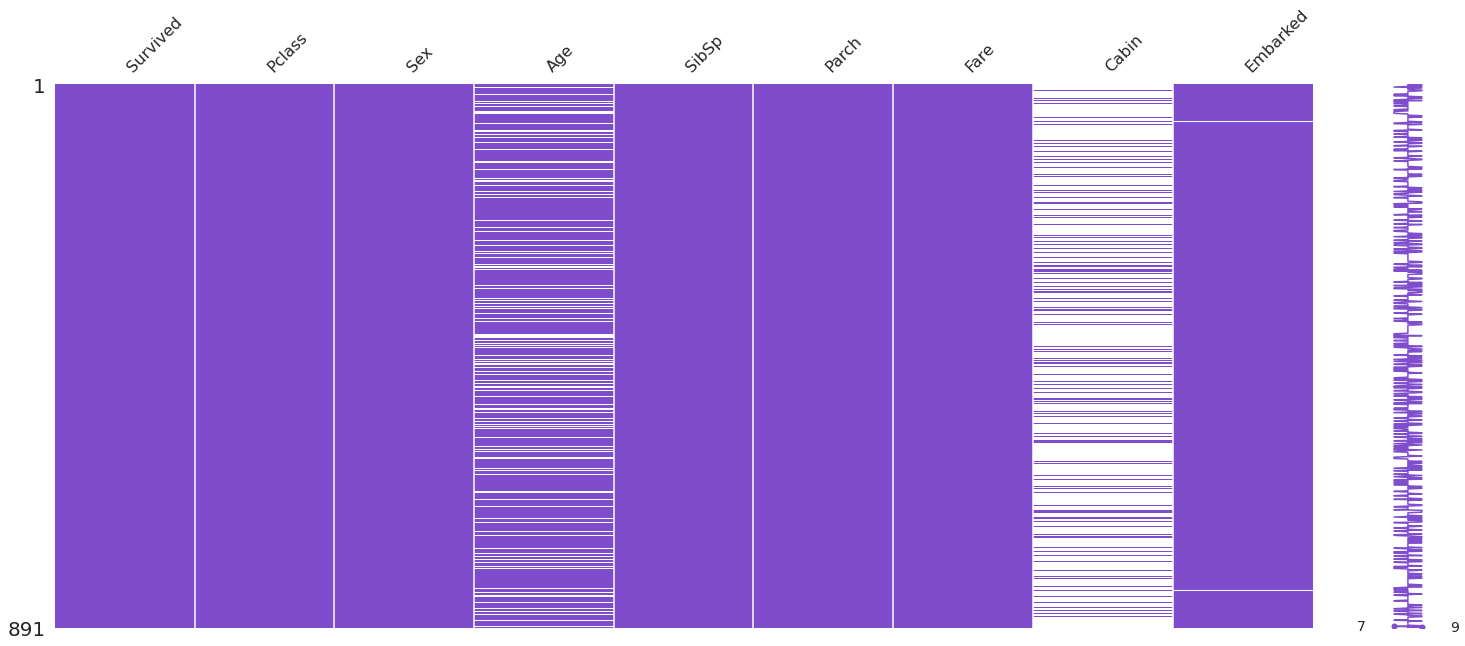

There are 177 missing values in column: Age
There are 687 missing values in column: Cabin
There are 2 missing values in column: Embarked


In [19]:
import missingno as msno
msno.matrix(train, color=(0.50,0.30,0.80))
plt.show()
x = train.isnull().sum()
for a, b in x.items():
    if b > 0:
        print(f"There are {b} missing values in column: {a}")

First, we will need to handle the missing values. We will be using our Machine Learning pipeline.

In [20]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,1,male,45.5,0,0,28.5000,C124,S
733,2,male,23.0,0,0,13.0000,NaN,S
382,3,male,32.0,0,0,7.9250,NaN,S
704,3,male,26.0,1,0,7.8542,NaN,S
813,3,female,6.0,4,2,31.2750,NaN,S


In [21]:
def cabinnull(data):
    data["Cabin"].fillna("M", inplace=True)
cabinnull(X_train)
cabinnull(X_test)

In [22]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,1,male,45.5,0,0,28.5000,C124,S
733,2,male,23.0,0,0,13.0000,M,S
382,3,male,32.0,0,0,7.9250,M,S
704,3,male,26.0,1,0,7.8542,M,S
813,3,female,6.0,4,2,31.2750,M,S


In [23]:
#handling missing values
tf1 = ColumnTransformer(transformers=[
    ("AgeImputer", SimpleImputer(), [2]),
    ("EmbarkedImputer", SimpleImputer(strategy="most_frequent"), [-1])
], remainder="passthrough")

In [24]:
#encoding categorical features
tf2 = ColumnTransformer(transformers=[
    ("SexEncoder", OrdinalEncoder(), [3]),
    ("EmbarkedOneHot", OneHotEncoder(sparse=False, handle_unknown="ignore"), [1,7])
], remainder="passthrough")

In [25]:
# Scaling
tf3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,-1))
])

In [26]:
# Model
tf4 = LogisticRegression()

In [27]:
pipe = make_pipeline(tf1,tf2,tf3,tf4)

In [28]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('AgeImputer', SimpleImputer(),
                                                  [2]),
                                                 ('EmbarkedImputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [-1])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SexEncoder',
                                                  OrdinalEncoder(), [3]),
                                                 ('EmbarkedOneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 7])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, -1, None))])),
                ('logisticregression', LogisticRegression())])

# Prediction and Accuracy Score

In [30]:
y_pred = pipe.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test, y_pred),3)*100
print(f"The accuracy of the model is: {accuracy}%")

The accuracy of the model is: 80.4%


In [32]:
accuracy_score(y_test, y_pred)

0.8044692737430168